# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data = pd.read_csv("election2024")

In [3]:
data.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


# Party with highest and lowest margin of victory

In [5]:
party_votes = data.groupby("Leading Party")["Margin"].sum().sort_values(ascending = False)
data["Margin"] = pd.to_numeric(data["Margin"], errors = "coerce")

#party with highest and lowest margin of victory
highest_margin = data.loc[data["Margin"].idxmax()]
lowest_margin = data.loc[data["Margin"].idxmin()]

# lets plot number of seats won by each party

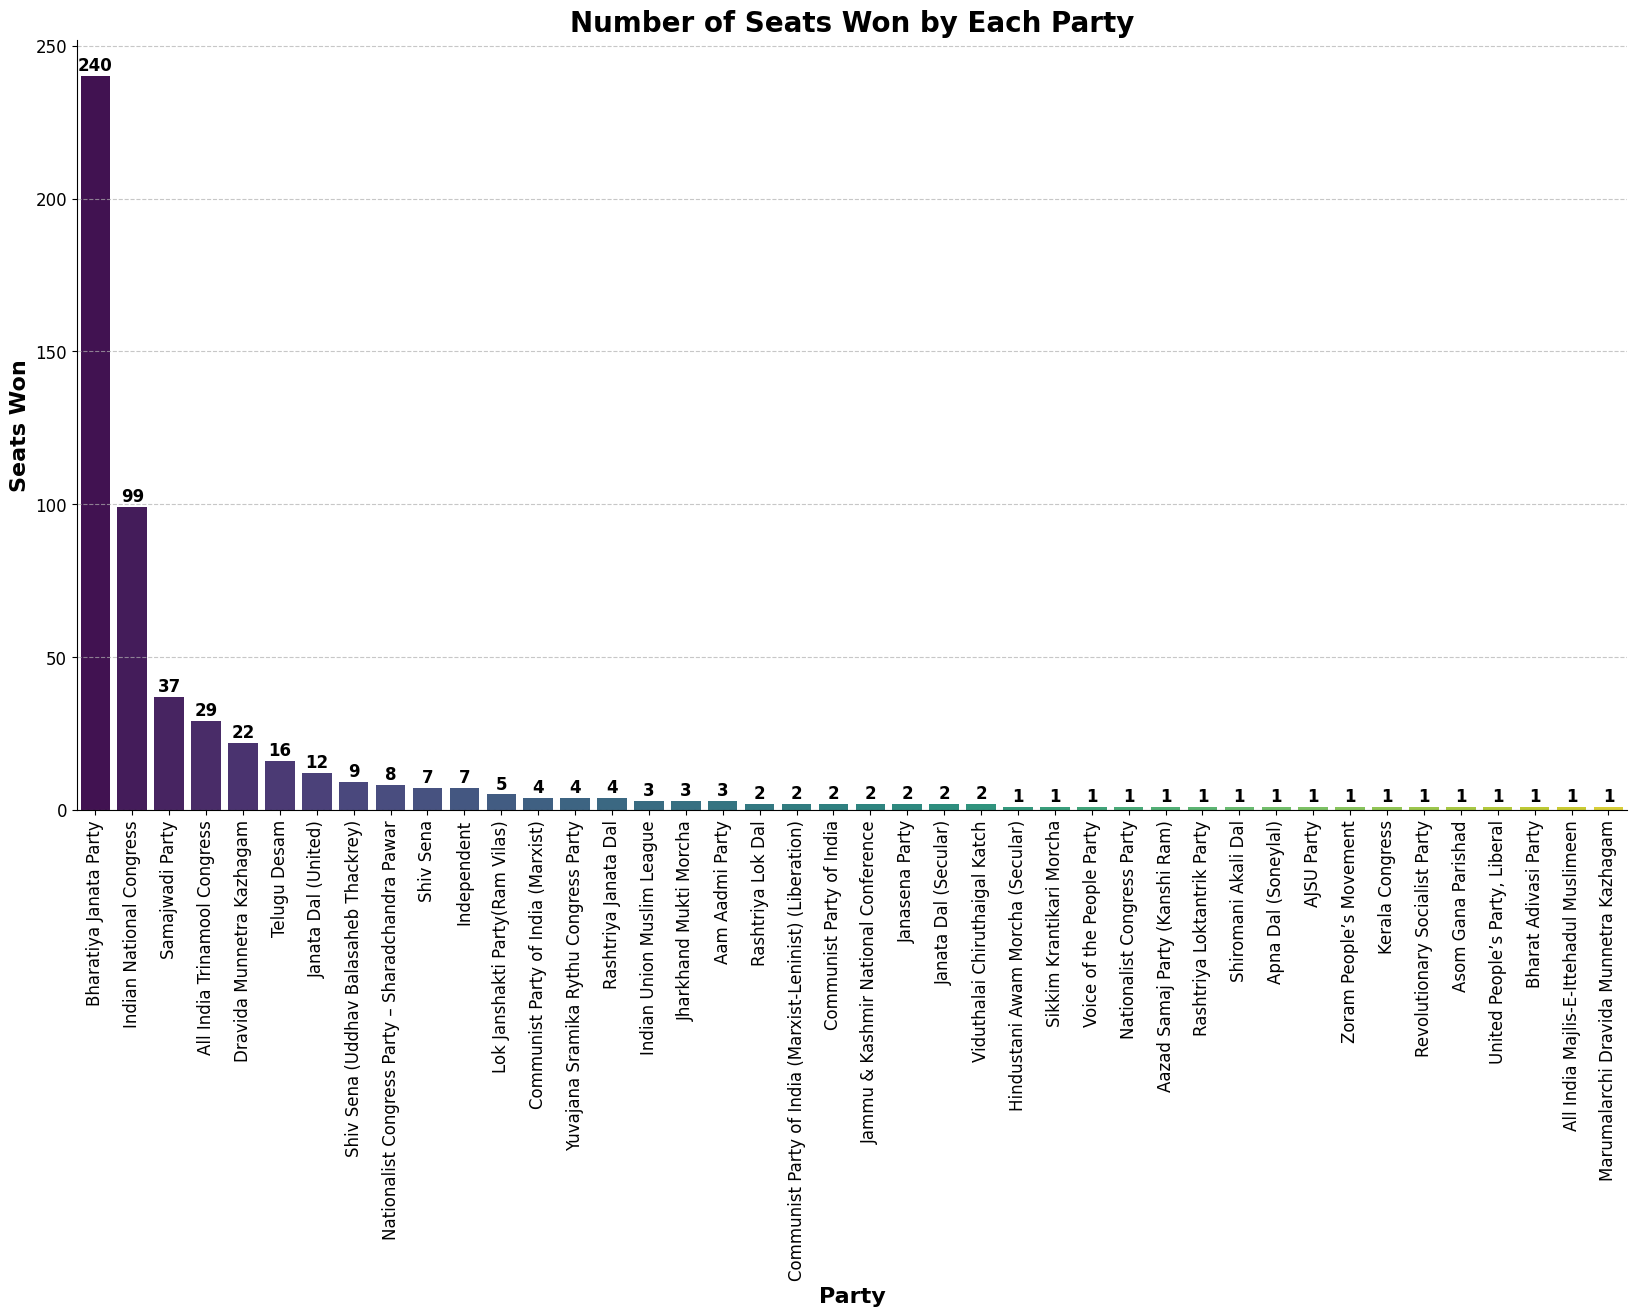

In [15]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
seats_won = data["Leading Party"].value_counts()

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=seats_won.index, y=seats_won.values, palette="viridis")

# Adding annotations for each bar
for index, value in enumerate(seats_won.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customizing the plot
plt.title("Number of Seats Won by Each Party", fontsize=20, fontweight='bold')
plt.xlabel('Party', fontsize=16, fontweight='bold')
plt.ylabel("Seats Won", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Showing the plot
plt.show()


# Get the votes of Rahul Gandhi, Narendra Modi, and Amit Shah

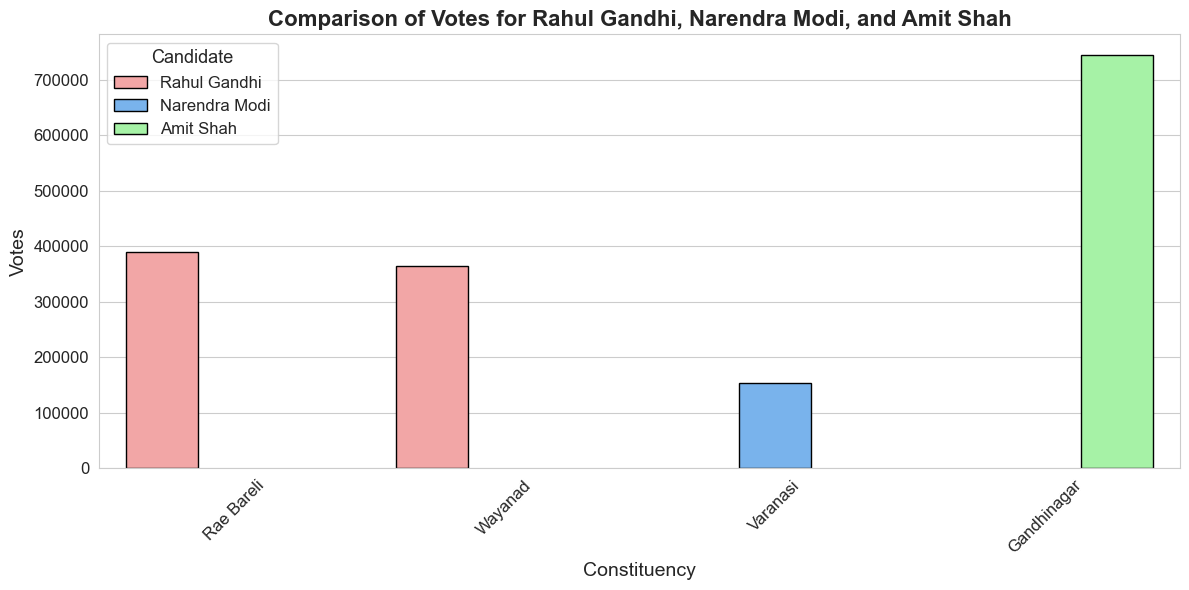

In [19]:
# Get the entries for each candidate
rahul_entries = data[data["Leading Candidate"] == "RAHUL GANDHI"]
modi_entries = data[data["Leading Candidate"] == "NARENDRA MODI"]
amit_entries = data[data["Leading Candidate"] == "AMIT SHAH"]

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries["Margin"].values
modi_votes = modi_entries["Margin"].values[0] if not modi_entries.empty else 0 
amit_votes = amit_entries["Margin"].values[0] if not amit_entries.empty else 0 

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries["Constituency"])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries["Constituency"].values[0] if not modi_entries.empty else "Modi constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries["Constituency"].values[0] if not amit_entries.empty else "Amit Shah constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    "Candidate": ["Rahul Gandhi"] * len(rahul_votes) + ["Narendra Modi", "Amit Shah"],
    "Constituency": rahul_constituencies + [modi_constituency, amit_constituency],
    "Votes": list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
cute_colors = ["#FF9999", "#66B3FF", "#99FF99"]
sns.barplot(data=data_to_plot, x="Constituency", y="Votes", hue="Candidate", palette=cute_colors, edgecolor='black')
plt.title("Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah", fontsize=16, weight='bold')
plt.xlabel("Constituency", fontsize=14)
plt.ylabel("Votes", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Candidate", title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()


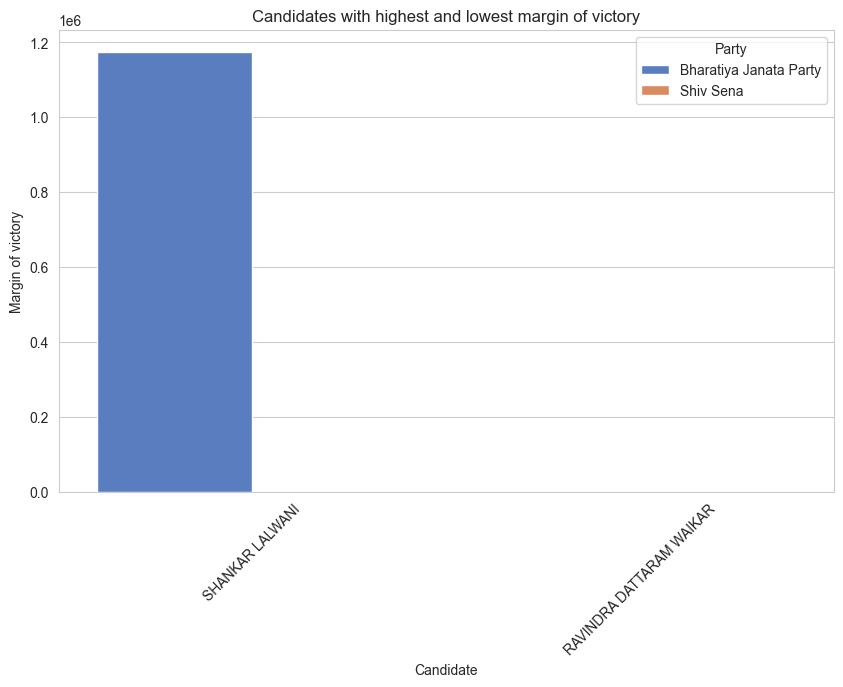

In [22]:
highest_margin_entry = data.loc[data["Margin"].idxmax()]
lowest_margin_entry = data.loc[data["Margin"].idxmin()]

#combine the data
data_to_plot = pd.DataFrame({
    "Candidate" : [highest_margin_entry["Leading Candidate"],lowest_margin_entry["Leading Candidate"]],
    "Party" : [highest_margin_entry["Leading Party"],lowest_margin_entry["Leading Party"]],
    "Margin" : [highest_margin_entry["Margin"], lowest_margin_entry["Margin"]]
})

#Plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(data = data_to_plot, x = "Candidate", y = "Margin", hue = "Party", palette = "muted")
plt.title("Candidates with highest and lowest margin of victory")
plt.xlabel("Candidate")
plt.ylabel("Margin of victory")
plt.xticks(rotation = 45)
plt.show()

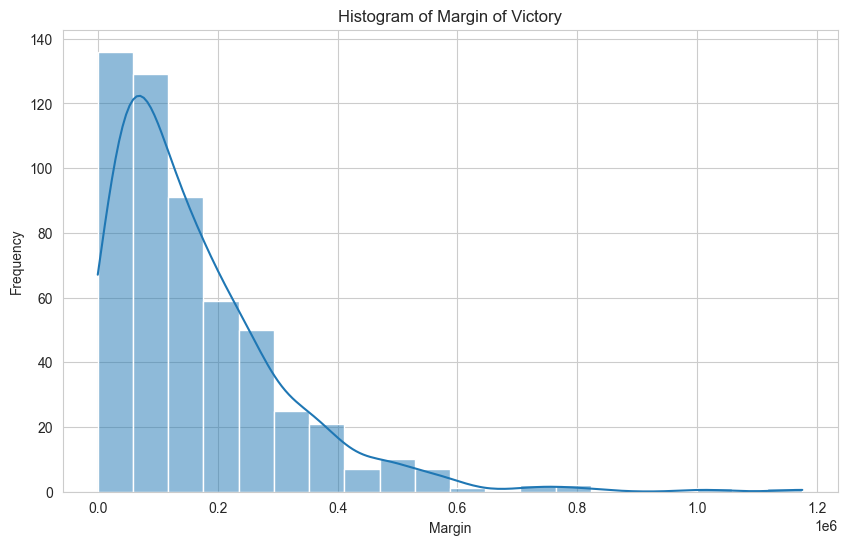

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data["Margin"], bins = 20, kde = True)
plt.title("Histogram of Margin of Victory")
plt.ylabel("Frequency")
plt.show()

# votes distribution by party

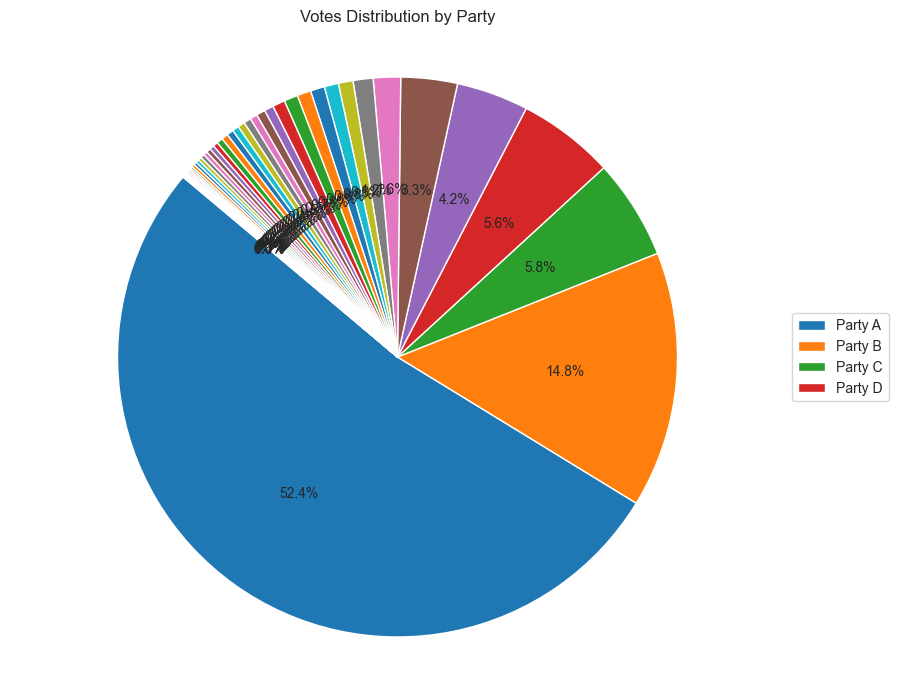

1

In [27]:
party_votes = data.groupby("Leading Party")["Margin"].sum().sort_values(ascending = False)
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct="%1.1f%%", startangle=140, wedgeprops=dict(edgecolor="w"))
plt.title("Votes Distribution by Party", pad=20)
plt.axis("equal")

plt.legend(labels=party_names, loc="center left", bbox_to_anchor=(1, 0.5), fontsize="medium")
plt.show()


In [35]:
# as we can see the pie chart is very conjested and is not showing the imformation correctly

# Reduce the number of categories for clear display of imformation

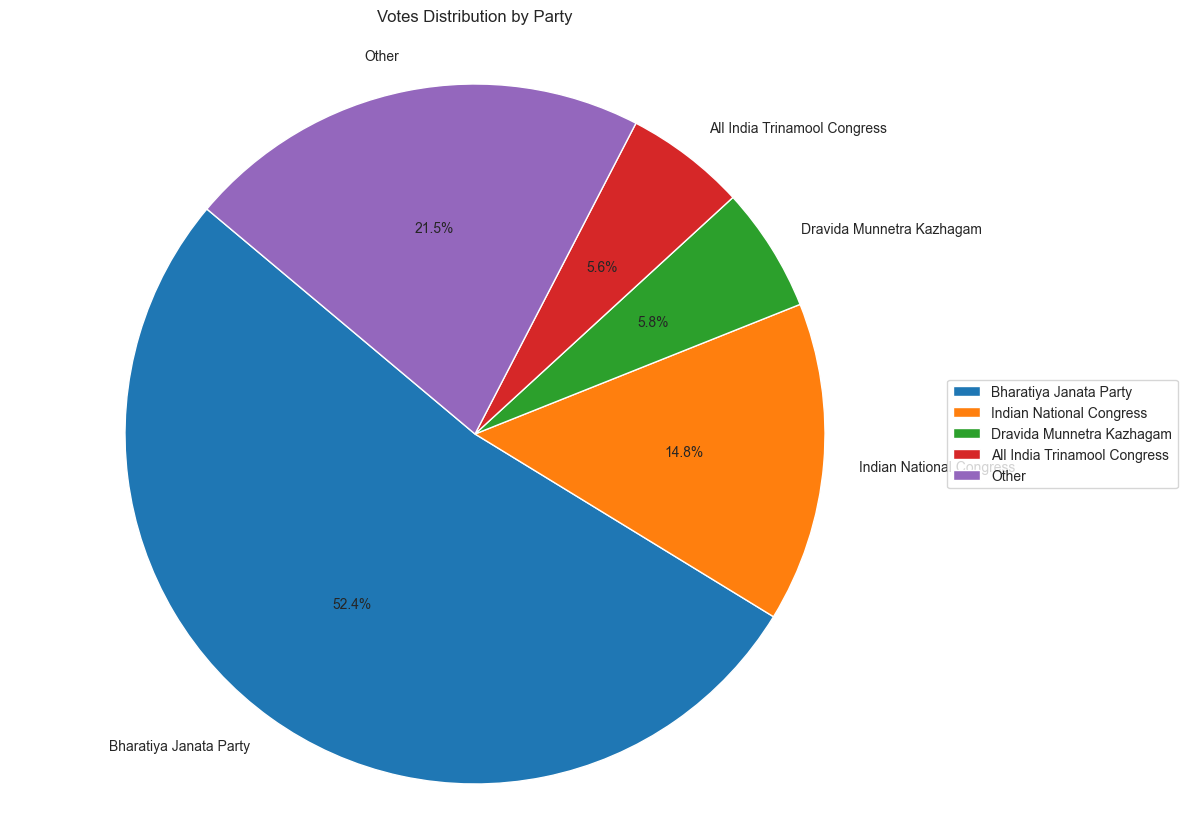

In [29]:
party_votes = data.groupby("Leading Party")["Margin"].sum().sort_values(ascending=False)

# Combine smaller categories into "Other"
threshold = 0.05  # Adjust this threshold as needed
other = party_votes[party_votes / party_votes.sum() < threshold].sum()
party_votes = party_votes[party_votes / party_votes.sum() >= threshold]
party_votes["Other"] = other

party_names = party_votes.index

plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(party_votes, labels=party_names, autopct="%1.1f%%", startangle=140, wedgeprops=dict(edgecolor="w"))
plt.title("Votes Distribution by Party", pad=20)
plt.axis("equal")

plt.legend(labels=party_names, loc="center left", bbox_to_anchor=(1, 0.5), fontsize="medium")

plt.show()


# use any other visualization method

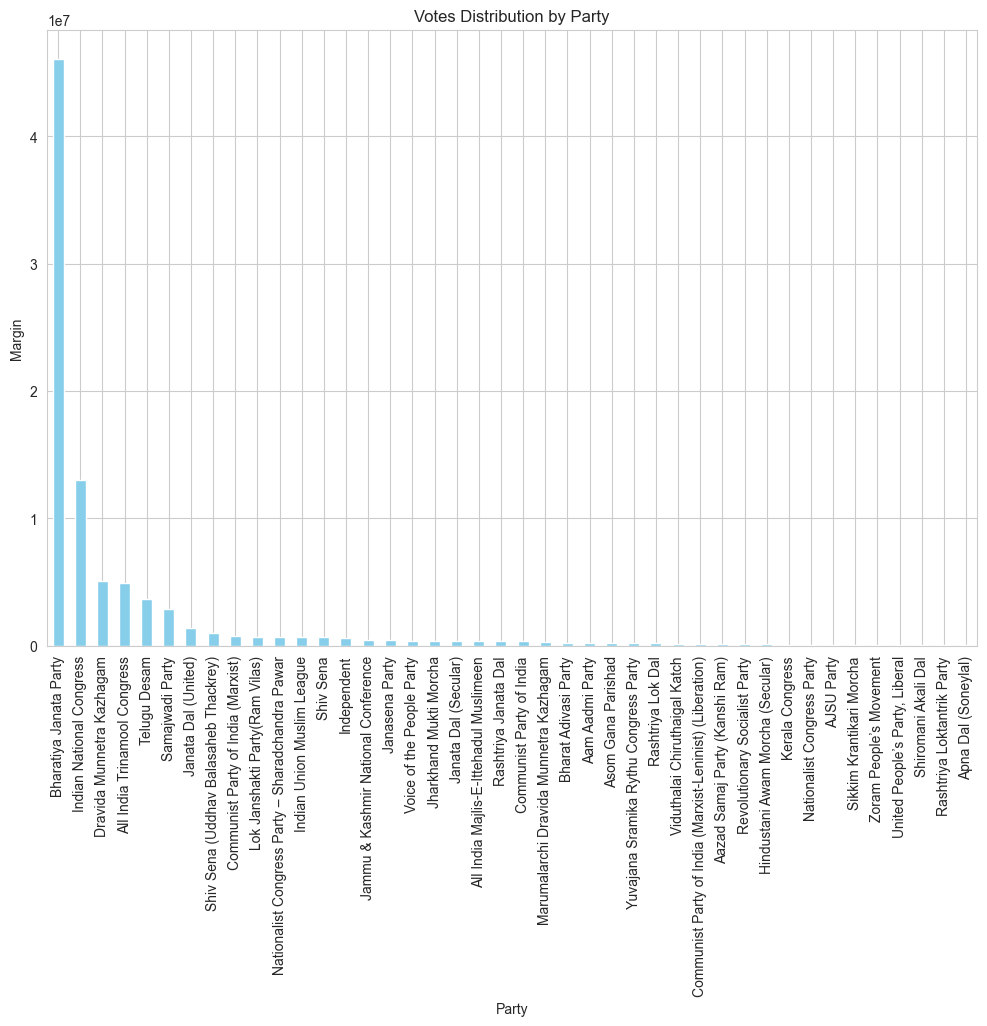

In [34]:
party_votes = data.groupby("Leading Party")["Margin"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
party_votes.plot(kind='bar', color='skyblue')
plt.title("Votes Distribution by Party")
plt.xlabel("Party")
plt.ylabel("Margin")
plt.xticks(rotation=90)
plt.show()


# Top ten trailing party by votes

In [36]:
trailing_party_votes = data.groupby("Trailing Party")["Margin"].sum().sort_values(ascending=False)
trailing_party_seats = data["Trailing Party"].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

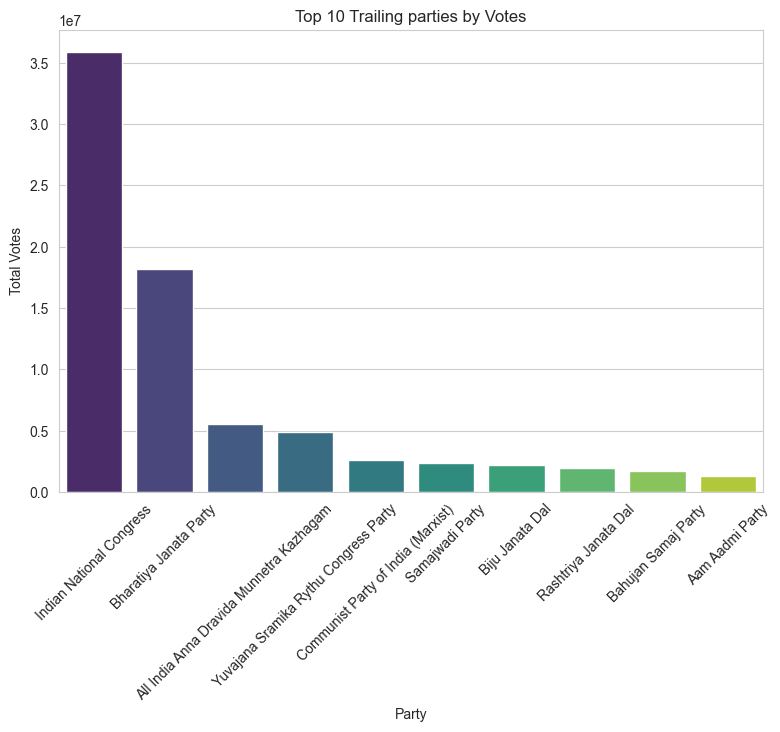

In [37]:
plt.figure(figsize=(20,6))

#plot votes distribution by trailing party
plt.subplot(1,2,1)
sns.barplot(x = trailing_party_votes.index[:10],y=trailing_party_votes.values[:10], palette = "viridis")
plt.title("Top 10 Trailing parties by Votes")
plt.xlabel("Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)


# top 10 trailing party by seat

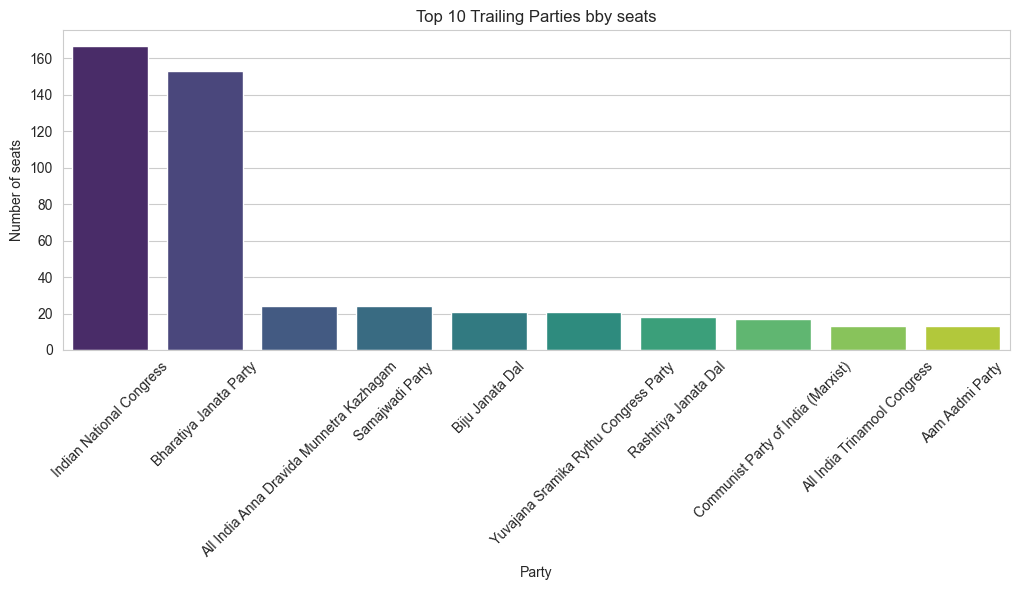

In [38]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.barplot(x = trailing_party_seats.index[:10], y = trailing_party_seats.values[:10],palette = "viridis")
plt.title("Top 10 Trailing Parties bby seats")
plt.xlabel("Party")
plt.ylabel("Number of seats")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()